## Plot the results of omega dome vs trigone

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype']=42
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import linregress
#from adjustText import adjust_text

In [2]:
import sys
sys.path.append('../../')
from consensus_variables import *

In [3]:
plots_dir = "plots"
data_dir = "data"

## dome vs trigone

In [4]:
omega_globalloc_dir = f"{deepcsa_run_dir}/omegagloballoc"

In [5]:
# load omega data
omega_df = pd.DataFrame()

for file in [file_ for file_ in os.listdir(omega_globalloc_dir) if file_.endswith(".tsv")]:
    sample_df = pd.read_csv(f"{omega_globalloc_dir}/{file}", sep = "\t", header = 0)
    sample_df["file"] = file
    sample_df["modality"] = "globalloc"
    omega_df = pd.concat((omega_df, sample_df)).reset_index(drop = True)

In [6]:
# filter by conseq type, profile and unique/multi modality
omega_df_f = omega_df.loc[(omega_df["gene"].isin(panel_no_hotspots)) &
                          (~omega_df["file"].str.contains("multi")) & 
                          (~omega_df["sample"].str.contains("non_prot_aff")) &
                          (omega_df["sample"].str.contains("P19")) &
                          (omega_df["impact"].isin(['missense', 'nonsense',
                                                    'essential_splice', 'truncating']))
                         ].reset_index(drop = True)
omega_df_f.head()

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,file,modality
0,CREBBP,P19_0036_BTR_01,missense,2,1.275195,0.742182,0.212011,3.961352,output_mle.P19_0036_BTR_01.global_loc.tsv,globalloc
1,ARID1A,P19_0036_BTR_01,missense,1,0.754712,0.768203,0.043454,3.339551,output_mle.P19_0036_BTR_01.global_loc.tsv,globalloc
2,CDKN1A,P19_0036_BTR_01,missense,1,3.483984,0.301423,0.199135,15.422461,output_mle.P19_0036_BTR_01.global_loc.tsv,globalloc
3,NOTCH2,P19_0036_BTR_01,missense,1,0.993848,0.995072,0.057079,4.397778,output_mle.P19_0036_BTR_01.global_loc.tsv,globalloc
4,RB1,P19_0036_BTR_01,missense,1,4.237500,0.243850,0.241707,18.752271,output_mle.P19_0036_BTR_01.global_loc.tsv,globalloc


In [7]:
omega_df_f['CLEAN_SAMPLE_ID'] = omega_df_f['sample'].map(old2new_sample_names)
omega_df_f['SINGLE_SAMPLE'] = omega_df_f['CLEAN_SAMPLE_ID'].isin(single_sample_per_donor)
omega_df_f['bladder_loc'] = omega_df_f['CLEAN_SAMPLE_ID'].apply(lambda x : x[3:])
omega_df_f['donor'] = omega_df_f['CLEAN_SAMPLE_ID'].apply(lambda x : x[:2])

In [8]:
len(omega_df_f["donor"].unique()) # number of subplots

45

In [9]:
omega_df_f = omega_df_f.sort_values(by = "donor").reset_index(drop= True)
omega_df_f

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,file,modality,CLEAN_SAMPLE_ID,SINGLE_SAMPLE,bladder_loc,donor
0,KMT2C,P19_0001_BDO_01,missense,1,0.731250,0.741907,0.041696,3.234912,output_mle.P19_0001_BDO_01.global_loc.tsv,globalloc,01_DO,False,DO,01
1,EP300,P19_0001_BDO_01,missense,4,1.879688,0.254783,0.582409,4.394946,output_mle.P19_0001_BDO_01.global_loc.tsv,globalloc,01_DO,False,DO,01
2,KMT2D,P19_0001_BDO_01,truncating,5,7.450391,0.000774,2.643927,16.294385,output_mle.P19_0001_BDO_01.global_loc.tsv,globalloc,01_DO,False,DO,01
3,KMT2D,P19_0001_BDO_01,essential_splice,1,5.758203,0.174594,0.327863,25.709985,output_mle.P19_0001_BDO_01.global_loc.tsv,globalloc,01_DO,False,DO,01
4,KMT2D,P19_0001_BDO_01,nonsense,4,8.043359,0.002000,2.462567,19.171289,output_mle.P19_0001_BDO_01.global_loc.tsv,globalloc,01_DO,False,DO,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,KMT2D,P19_0053_BTR_01,nonsense,32,12.712500,0.000000,8.416568,18.657324,output_mle.P19_0053_BTR_01.global_loc.tsv,globalloc,53_TR,True,TR,53
3124,KMT2D,P19_0053_BTR_01,missense,35,1.278513,0.176281,0.890774,1.772287,output_mle.P19_0053_BTR_01.global_loc.tsv,globalloc,53_TR,True,TR,53
3125,KDM6A,P19_0053_BTR_01,truncating,5,12.575049,0.000064,4.469580,27.467627,output_mle.P19_0053_BTR_01.global_loc.tsv,globalloc,53_TR,True,TR,53
3126,EP300,P19_0053_BDO_01,essential_splice,4,14.237500,0.000211,4.385755,33.578320,output_mle.P19_0053_BDO_01.global_loc.tsv,globalloc,53_DO,False,DO,53


In [10]:
donors_and_impact = [#("14", "missense"),
                     # ("14", "nonsense"),
                     #("14", "truncating"),
                     ("23", "missense"),
                     # ("23", "nonsense"),
                     ("23", "truncating"),
                     ("04", "missense"),
                     ("04", "truncating"),
                    ]


In [11]:
# plot per omega type
donors_and_impact = [#("04", "missense"),
                     ("04", "truncating"),
                     ("09", "missense"),
                     #("09", "truncating"),
                    ]

In [12]:
donors_and_impact = [("14", "missense"),
                     ("04", "missense"),
                     ("23", "missense"),
                     ("14", "truncating"),
                     ("04", "truncating"),
                     ("23", "truncating"),
                    ]


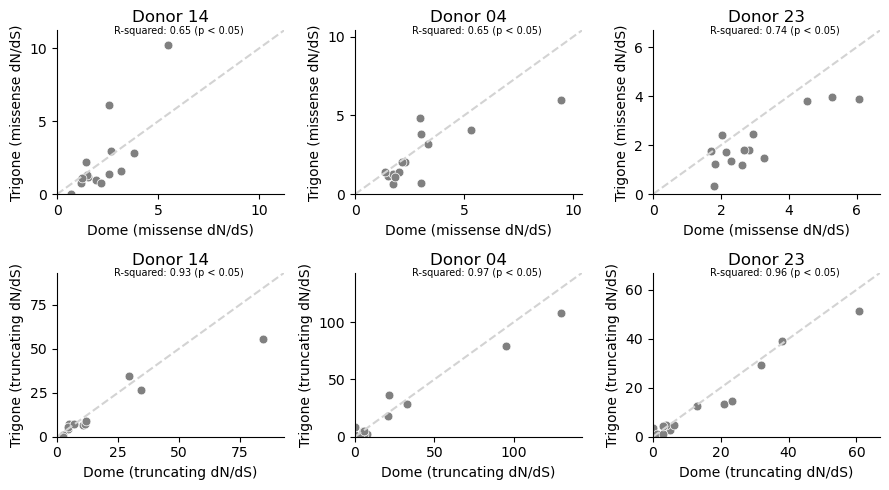

In [15]:
# define plot features
nrows_subplots = 2
ncols_subplots = 3
fig, axs = plt.subplots(nrows_subplots, ncols_subplots, figsize = (9, 5), sharey = False)
axs = axs.flatten()

# plot each donor separately
for i, tupl in enumerate(donors_and_impact):

    donor = tupl[0]
    impact = tupl[1]
    
    # subset by impact and create two tables: one for dnds, the other one for pvalues
    subset_df = omega_df_f.loc[omega_df_f["impact"] == impact]
    subset_df_piv = subset_df.pivot(index = ['donor', 'gene'], columns = 'bladder_loc', values = 'dnds').reset_index()
    subset_df_pvals_piv = subset_df.pivot(index = ['donor', 'gene'], columns = 'bladder_loc', values = 'pvalue').reset_index()
    
    ## subset donor 
    donor_subset_df = subset_df_piv.loc[subset_df_piv["donor"] == donor]
    donor_subset_pvals_df = subset_df_pvals_piv.loc[subset_df_pvals_piv["donor"] == donor]

    ## replace NA with 0 for dnds to avoid errors and merge w/ pvals
    donor_subset_df = donor_subset_df.replace(np.nan, 0)
    donor_subset_df = donor_subset_df.merge(donor_subset_pvals_df, on = ["donor", "gene"], suffixes = ["_dnds", "_pval"])

    ## plot dots and regression line
    sns.scatterplot(data = donor_subset_df, x = "DO_dnds", y = "TR_dnds", 
            ax = axs[i], legend = False, s = 40, color = "grey")

    min_val = -0.005
    max_val = max(donor_subset_df["DO_dnds"].max()*1.1, donor_subset_df["TR_dnds"].max()*1.1)
    axs[i].plot([min_val, max_val], [min_val, max_val], color = 'lightgrey', linestyle = '--')
    axs[i].set_xlim(min_val, max_val)
    axs[i].set_ylim(min_val, max_val)

    # make sure that the y and x axis ticks are the same
    xtickss = axs[i].get_xticks()
    ytickss = axs[i].get_yticks()
    if len(ytickss) > len(xtickss):
        axs[i].set_xticks(xtickss)
        axs[i].set_yticks(xtickss)
    else:
        axs[i].set_xticks(ytickss)
        axs[i].set_yticks(ytickss)
    axs[i].set_xlim(min_val, max_val)
    axs[i].set_ylim(min_val, max_val)

    
    
    ## annotate significant genes
    texts = []
    #for idx, row in donor_subset_df.iterrows():
        # if (row['dome_pval'] < 0.05) or (row['trigone_pval'] < 0.05):  
#        if (row['DO_pval'] < 0.05) and (row['TR_pval'] < 0.05):  
#            if (row["DO_dnds"] > (donor_subset_df["DO_dnds"].max()+2)/2) and (row["TR_dnds"] > (donor_subset_df["TR_dnds"].max()+2)/2):
            
                #text = axs[i].annotate(
                #            row['gene'],  
                #            (row['DO_dnds'], row['TR_dnds']), 
                #            # textcoords = "offset points", xytext = (0, 0),  
                #            arrowprops = dict(arrowstyle = "->", color = 'black', lw = 0.5))
                #texts.append(text)
    #adjust_text(texts, ax = axs[i], arrowprops = dict(arrowstyle = "->", color = 'black'),
                # force_text = 0.1,
                # force_points = 0.1
    #           )

    ## calculate linear regression fit if possible; otherwise, NA
    x1 = donor_subset_df[["DO_dnds", "TR_dnds"]].dropna()["DO_dnds"].values 
    y1 = donor_subset_df[["DO_dnds", "TR_dnds"]].dropna()["TR_dnds"].values
    try:
            res = linregress(x = x1, y = y1)
            r_squared = res.rvalue**2
            p_value = res.pvalue
            if p_value < 0.05:
                p_value = " < 0.05"
            else:
                p_value = r'$\geq0.05$'
            box_props = dict(boxstyle='square', facecolor='white', alpha=0.7)
            axs[i].annotate(f'R-squared: {r_squared:.2f} (p{p_value})', xy=(0.25, 0.98), xycoords='axes fraction',
                            fontsize=7, color='black')
    except ValueError:
            r_squared = "NA"
            p_value = "NA"
            box_props = dict(boxstyle='square', facecolor='white', alpha=0.7)
            axs[i].annotate(f'R-squared: {r_squared} (p-value: {p_value})', xy=(0.25, 0.98), xycoords='axes fraction',
                            fontsize=7, color='black')

    ## finish annotating plot
    axs[i].set_ylabel(f"Trigone ({impact} dN/dS)")
    axs[i].set_xlabel(f"Dome ({impact} dN/dS)")
    axs[i].set_title(f"Donor {donor}")
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)

plt.tight_layout()
fig.savefig(f"{plots_dir}/ExtendedFig5_b.png", bbox_inches='tight', dpi = 300)
plt.show()

NameError: name 'adjust_text' is not defined

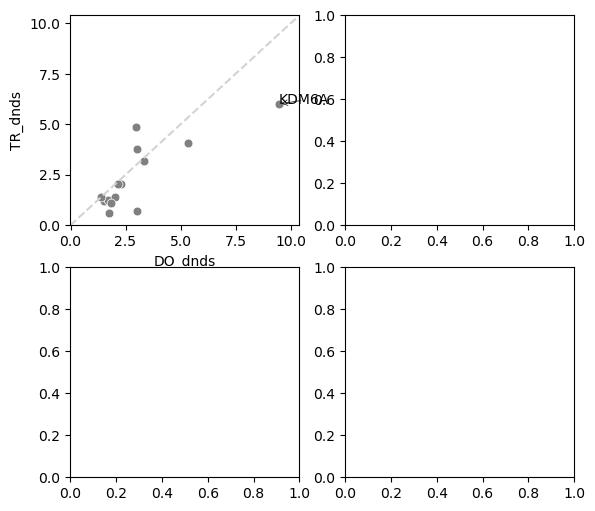

In [12]:
# plot per omega type
donors_and_impact = [#("14", "missense"),
                     ("04", "missense"),
                     ("23", "missense"),
                     #("14", "truncating"),
                     ("04", "truncating"),
                     ("23", "truncating"),                     
                    ]

# define plot features
nrows_subplots = 2
ncols_subplots = 2
fig, axs = plt.subplots(nrows_subplots, ncols_subplots, figsize = (6.5, 6), sharey = False)
axs = axs.flatten()

# plot each donor separately
for i, tupl in enumerate(donors_and_impact):

    donor = tupl[0]
    impact = tupl[1]
    
    # subset by impact and create two tables: one for dnds, the other one for pvalues
    subset_df = omega_df_f.loc[omega_df_f["impact"] == impact]
    subset_df_piv = subset_df.pivot(index = ['donor', 'gene'], columns = 'bladder_loc', values = 'dnds').reset_index()
    subset_df_pvals_piv = subset_df.pivot(index = ['donor', 'gene'], columns = 'bladder_loc', values = 'pvalue').reset_index()
    
    ## subset donor 
    donor_subset_df = subset_df_piv.loc[subset_df_piv["donor"] == donor]
    donor_subset_pvals_df = subset_df_pvals_piv.loc[subset_df_pvals_piv["donor"] == donor]

    ## replace NA with 0 for dnds to avoid errors and merge w/ pvals
    donor_subset_df = donor_subset_df.replace(np.nan, 0)
    donor_subset_df = donor_subset_df.merge(donor_subset_pvals_df, on = ["donor", "gene"], suffixes = ["_dnds", "_pval"])

    ## plot dots and regression line
    sns.scatterplot(data = donor_subset_df, x = "DO_dnds", y = "TR_dnds", 
            ax = axs[i], legend = False, s = 40, color = "grey")

    min_val = -0.005
    max_val = max(donor_subset_df["DO_dnds"].max()*1.1, donor_subset_df["TR_dnds"].max()*1.1)
    axs[i].plot([min_val, max_val], [min_val, max_val], color = 'lightgrey', linestyle = '--')
    axs[i].set_xlim(min_val, max_val)
    axs[i].set_ylim(min_val, max_val)
    
    # make sure that the y and x axis ticks are the same
    xtickss = axs[i].get_xticks()
    ytickss = axs[i].get_yticks()
    if len(ytickss) > len(xtickss):
        axs[i].set_xticks(xtickss)
        axs[i].set_yticks(xtickss)
    else:
        axs[i].set_xticks(ytickss)
        axs[i].set_yticks(ytickss)
    axs[i].set_xlim(min_val, max_val)
    axs[i].set_ylim(min_val, max_val)
    
    
    ## annotate significant genes
    texts = []
    for idx, row in donor_subset_df.iterrows():
        # if (row['dome_pval'] < 0.05) or (row['trigone_pval'] < 0.05):  
        if (row['DO_pval'] < 0.05) and (row['TR_pval'] < 0.05):  
            if (row["DO_dnds"] > (donor_subset_df["DO_dnds"].max()+2)/2) and (row["TR_dnds"] > (donor_subset_df["TR_dnds"].max()+2)/2):
            
                text = axs[i].annotate(
                            row['gene'],  
                            (row['DO_dnds'], row['TR_dnds']), 
                            # textcoords = "offset points", xytext = (0, 0),  
                            arrowprops = dict(arrowstyle = "->", color = 'black', lw = 0.5))
                texts.append(text)
    adjust_text(texts, ax = axs[i], arrowprops = dict(arrowstyle = "->", color = 'black'),
                # force_text = 0.1,
                # force_points = 0.1
               )

    ## calculate linear regression fit if possible; otherwise, NA
    x1 = donor_subset_df[["DO_dnds", "TR_dnds"]].dropna()["DO_dnds"].values 
    y1 = donor_subset_df[["DO_dnds", "TR_dnds"]].dropna()["TR_dnds"].values
    try:
            res = linregress(x = x1, y = y1)
            r_squared = res.rvalue**2
            p_value = res.pvalue
            if p_value < 0.05:
                p_value = " < 0.05"
            else:
                p_value = r'$\geq0.05$'
            box_props = dict(boxstyle='square', facecolor='white', alpha=0.7)
            axs[i].annotate(f'R-squared: {r_squared:.2f} (p{p_value})', xy=(0.25, 0.98), xycoords='axes fraction',
                            fontsize=7, color='black')
    except ValueError:
            r_squared = "NA"
            p_value = "NA"
            box_props = dict(boxstyle='square', facecolor='white', alpha=0.7)
            axs[i].annotate(f'R-squared: {r_squared} (p-value: {p_value})', xy=(0.25, 0.98), xycoords='axes fraction',
                            fontsize=7, color='black')

    ## finish annotating plot
    axs[i].set_ylabel(f"Trigone ({impact} dN/dS)")
    axs[i].set_xlabel(f"Dome ({impact} dN/dS)")
    axs[i].set_title(f"Donor {donor}")
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)

plt.tight_layout()
fig.savefig(f"{plots_dir}/Fig2d_4.png", bbox_inches='tight')
plt.show()

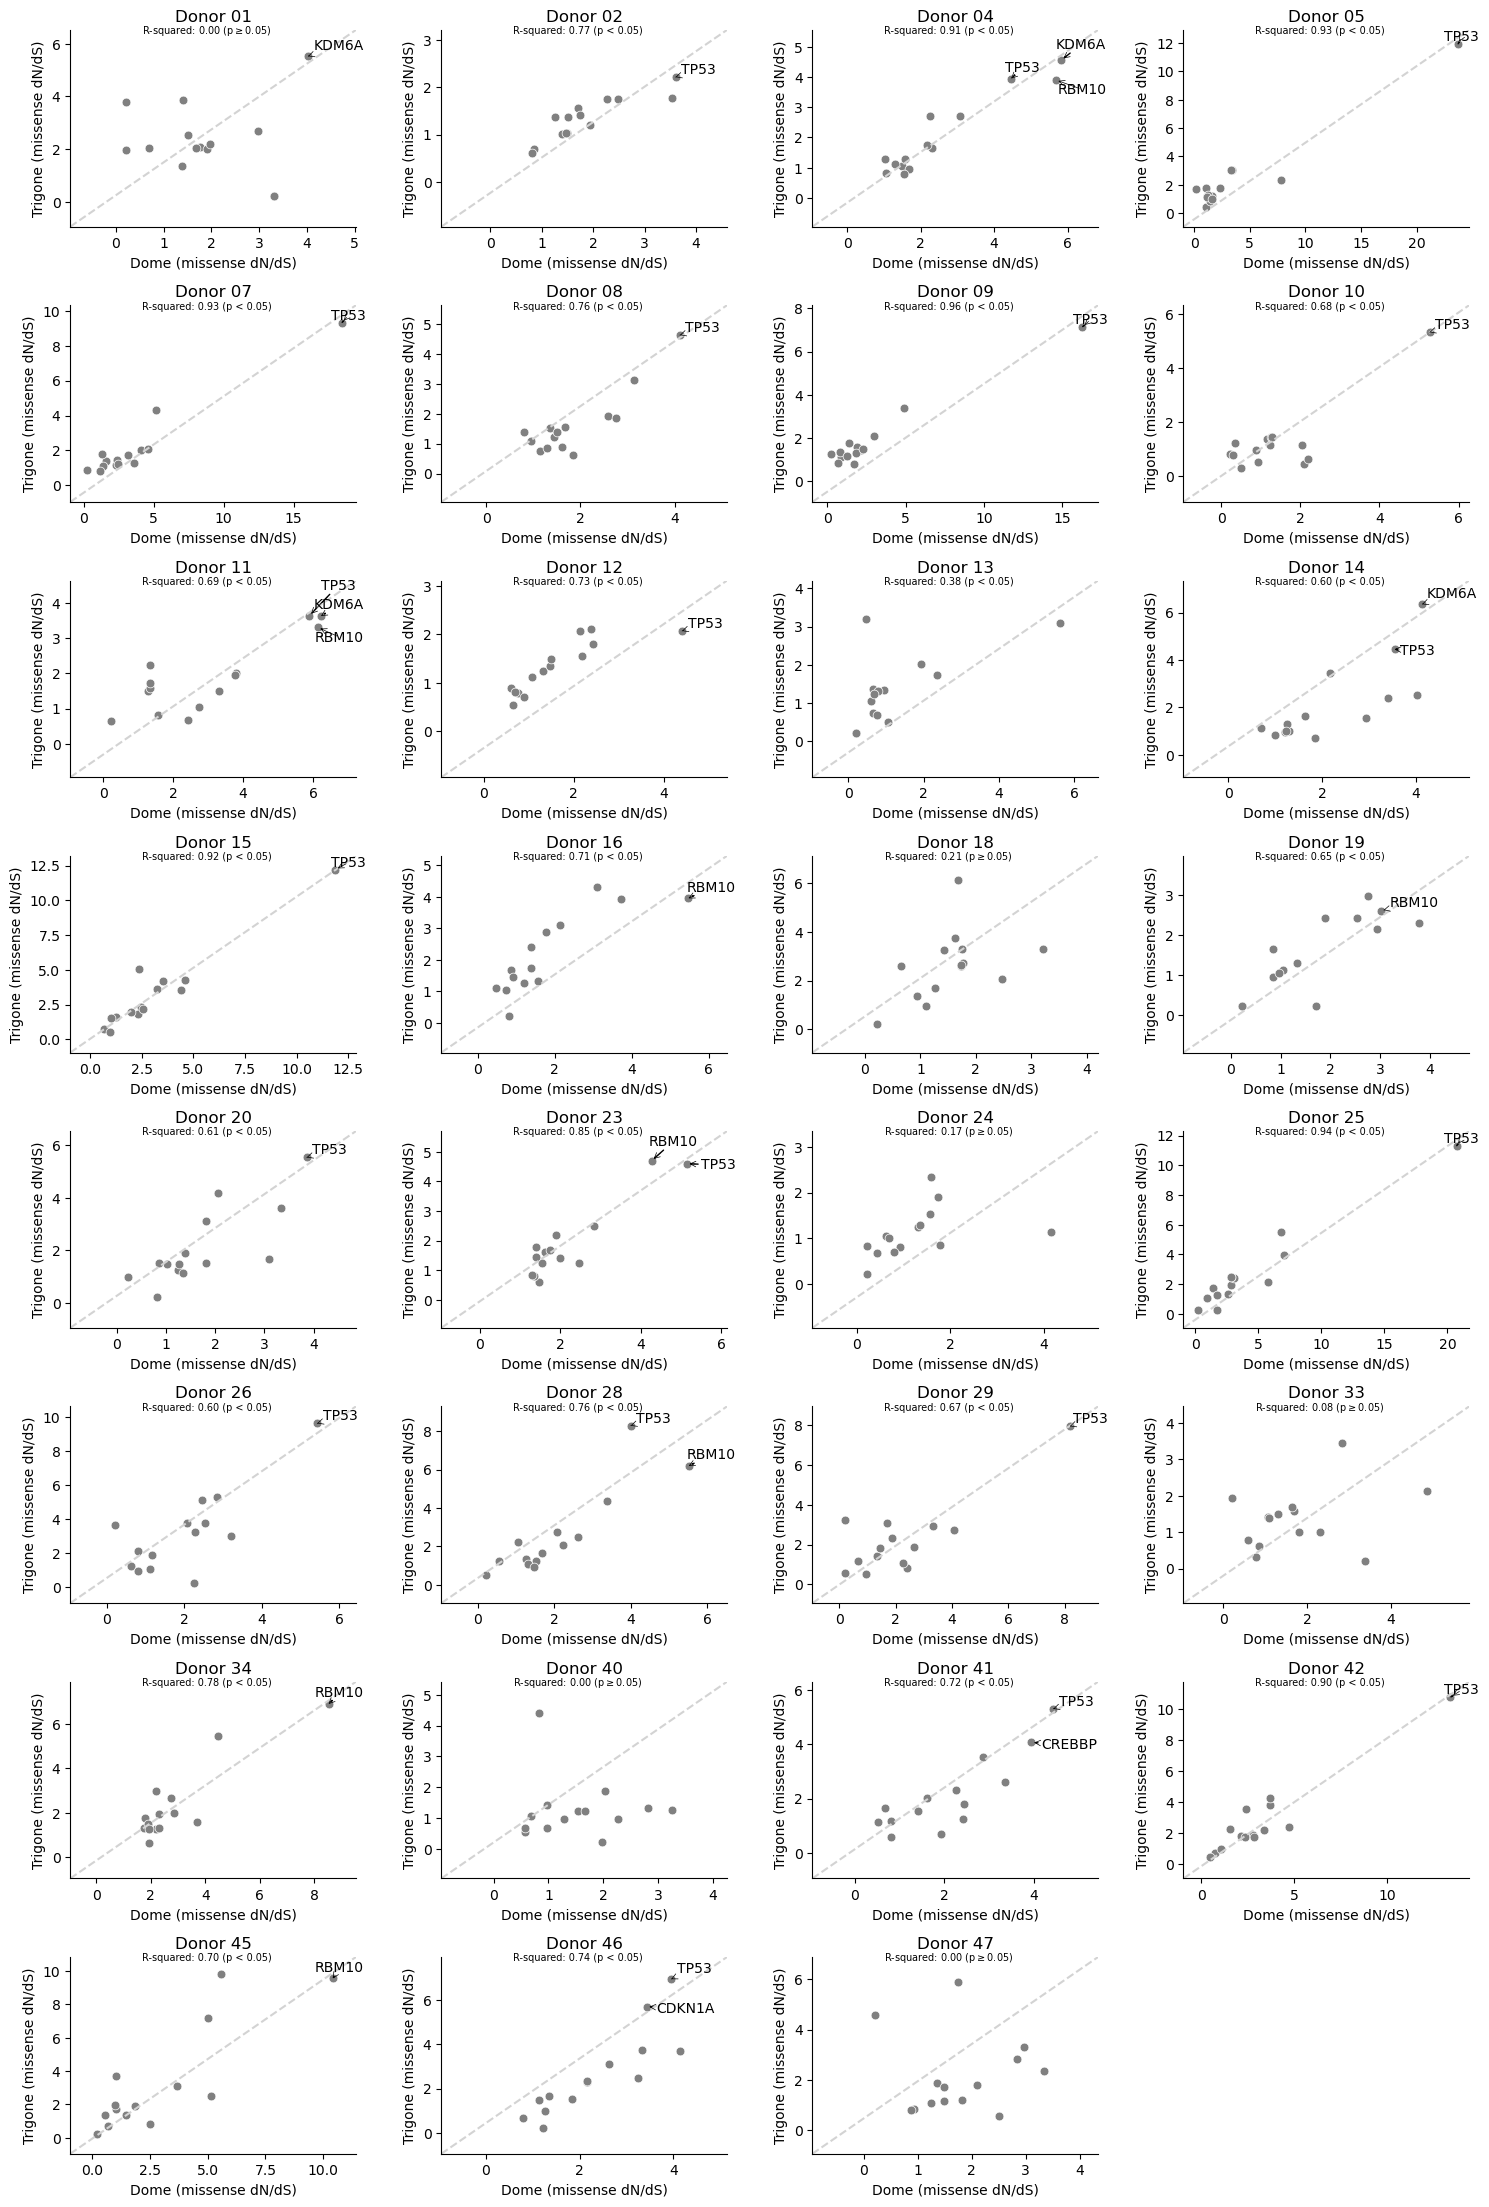

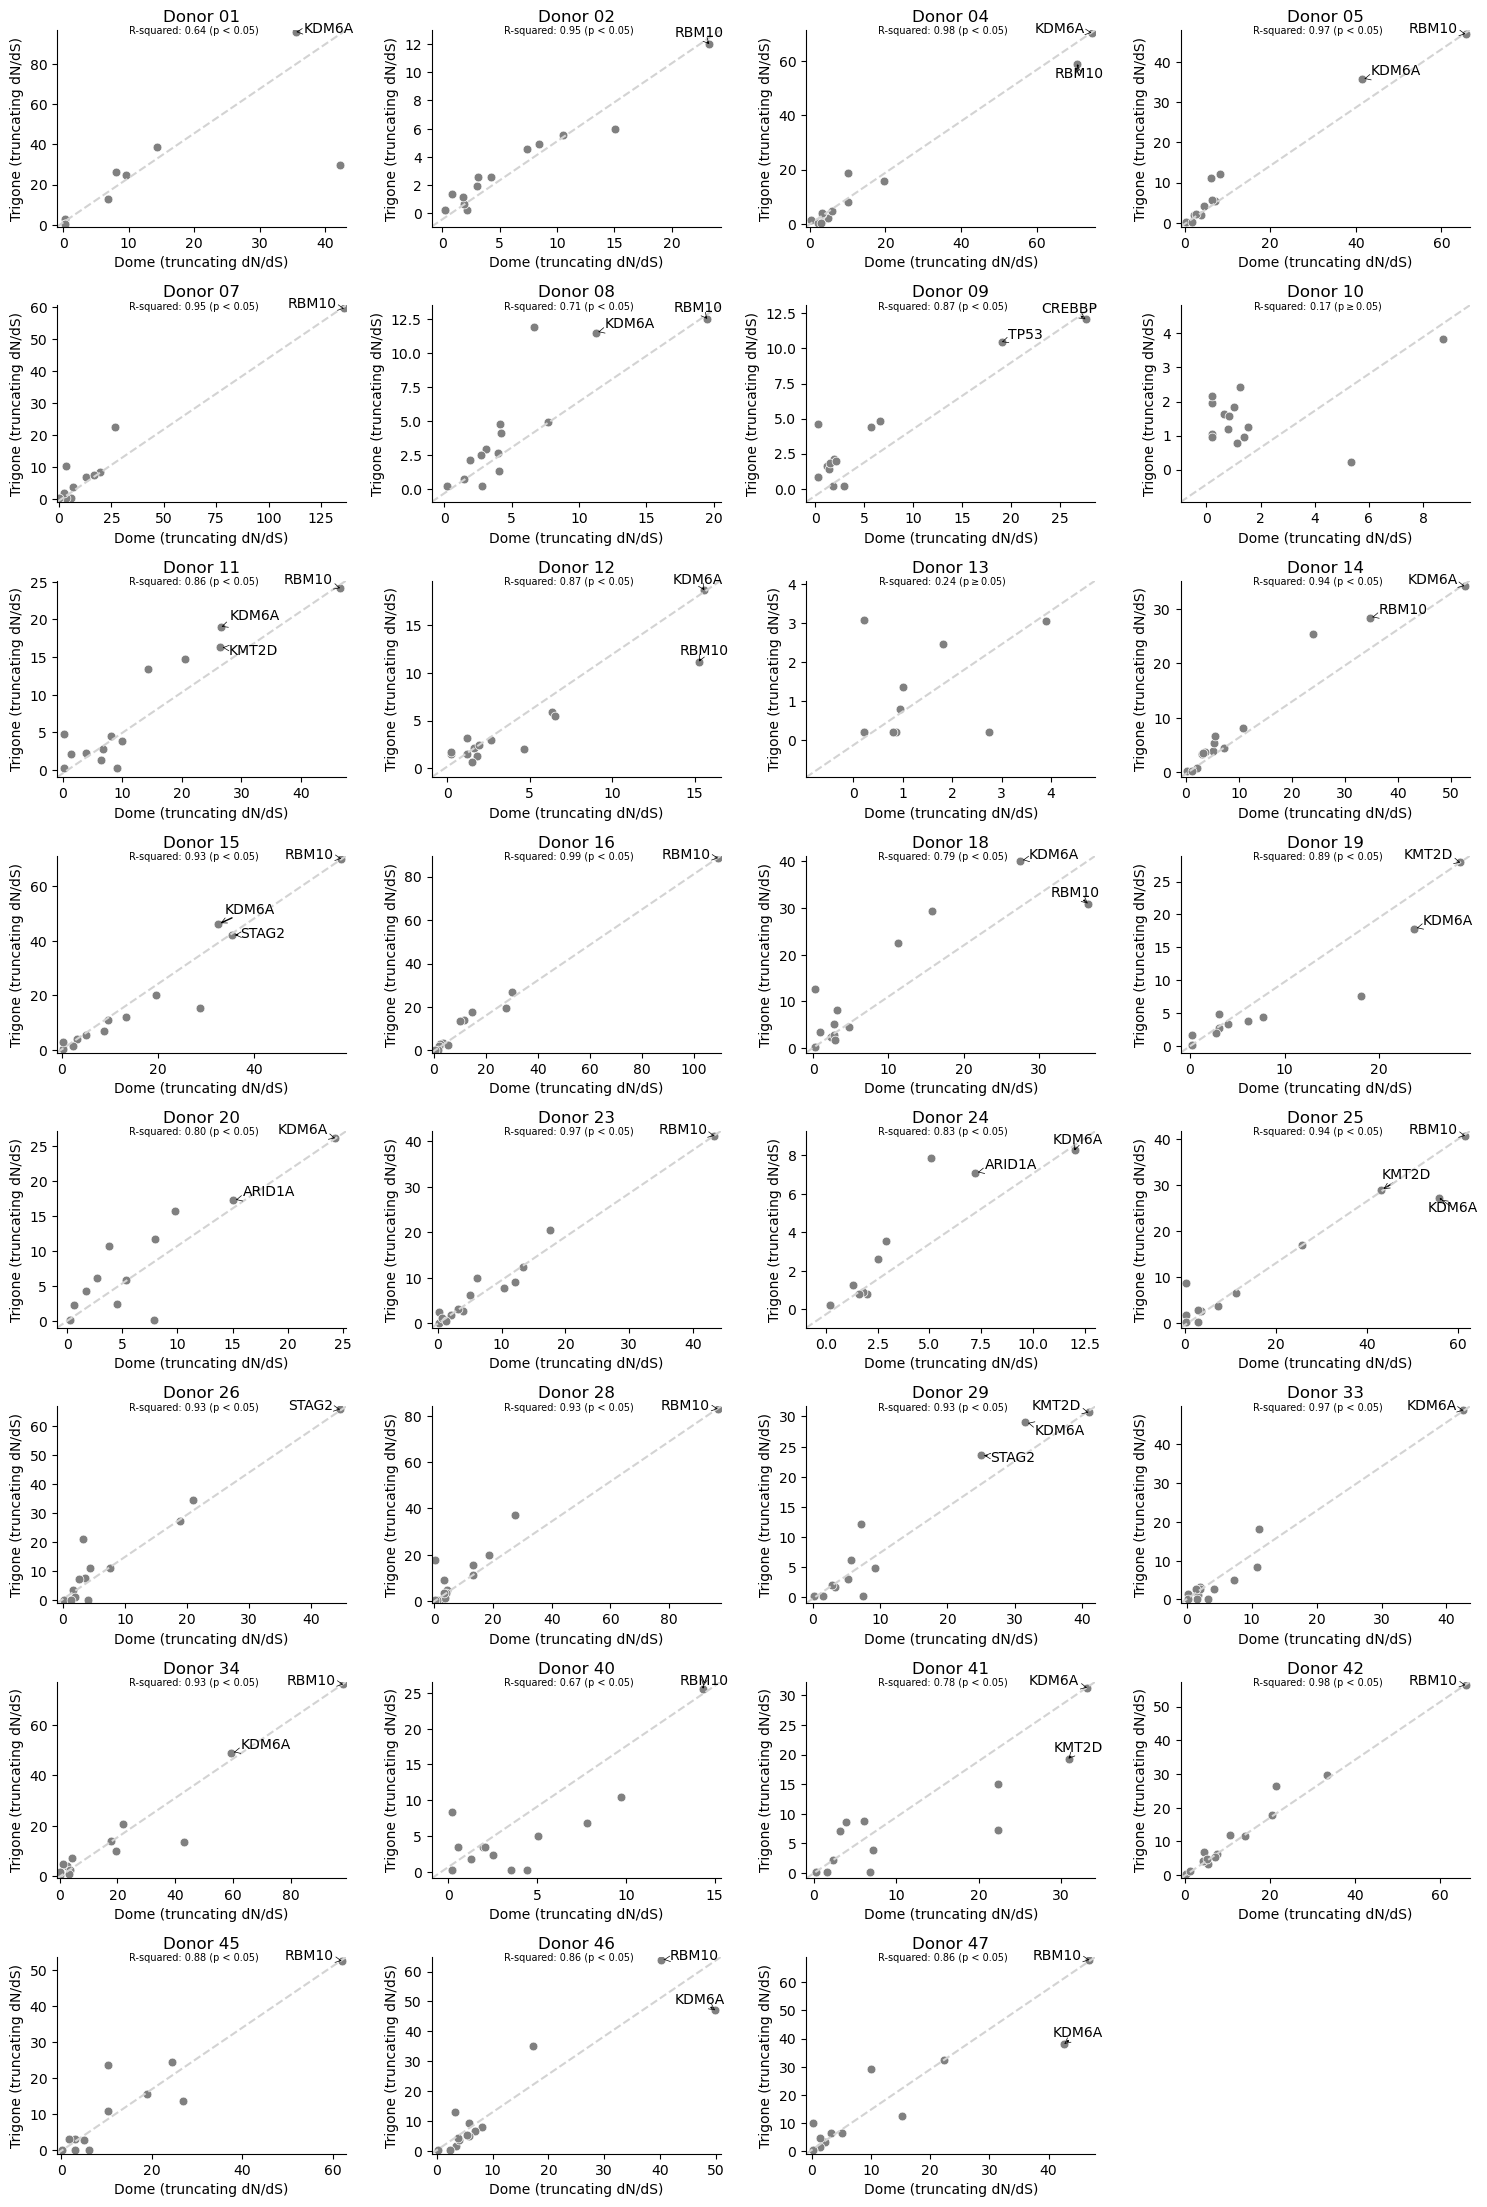

In [9]:
# plot per omega type
for impact in ["missense", "truncating"]:

        # subset by impact and create two tables: one for dnds, the other one for pvalues
        subset_df = omega_df_f.loc[omega_df_f["impact"] == impact]
        subset_df_piv = subset_df.pivot(index = ['donor', 'gene'], columns = 'bladder_loc', values = 'dnds').reset_index()
        subset_df_pvals_piv = subset_df.pivot(index = ['donor', 'gene'], columns = 'bladder_loc', values = 'pvalue').reset_index()

        # define plot features
        nrows_subplots = 11
        ncols_subplots = 4
        fig, axs = plt.subplots(nrows_subplots, ncols_subplots, figsize = (15, 30), sharey = False)
        axs = axs.flatten()
        j = 0

        # plot each donor separately
        for i, donor in enumerate(omega_df_f["donor"].unique()):
                
                i = i + j
                ## subset donor 
                donor_subset_df = subset_df_piv.loc[subset_df_piv["donor"] == donor]
                donor_subset_pvals_df = subset_df_pvals_piv.loc[subset_df_pvals_piv["donor"] == donor]

                ## skip donor if dome or trigone is not available
                if donor_subset_df["DO"].isna().all() or donor_subset_df["TR"].isna().all():
                        j += -1
                        continue

                ## replace NA with 0 for dnds to avoid errors and merge w/ pvals
                donor_subset_df = donor_subset_df.replace(np.nan, 0)
                donor_subset_df = donor_subset_df.merge(donor_subset_pvals_df, on = ["donor", "gene"], suffixes = ["_dnds", "_pval"])

                ## plot dots and regression line
                sns.scatterplot(data = donor_subset_df, x = "DO_dnds", y = "TR_dnds", 
                        ax = axs[i], legend = False, s = 40, color = "grey")
                axs[i].plot([-0.95, donor_subset_df["DO_dnds"].max()+1], [-0.95, donor_subset_df["TR_dnds"].max()+1], color = 'lightgrey', linestyle = '--')

                ## annotate significant genes
                texts = []
                for idx, row in donor_subset_df.iterrows():
                    # if (row['DO_pval'] < 0.05) or (row['TR_pval'] < 0.05):  
                    if (row['DO_pval'] < 0.05) and (row['TR_pval'] < 0.05):  
                        if (row["DO_dnds"] > (donor_subset_df["DO_dnds"].max()+2)/2) and (row["TR_dnds"] > (donor_subset_df["TR_dnds"].max()+2)/2):
                        
                            text = axs[i].annotate(
                                        row['gene'],  
                                        (row['DO_dnds'], row['TR_dnds']), 
                                        # textcoords = "offset points", xytext = (0, 0),  
                                        arrowprops = dict(arrowstyle = "->", color = 'black', lw = 0.5))
                            texts.append(text)
                adjust_text(texts, ax = axs[i], arrowprops = dict(arrowstyle = "->", color = 'black'),
                            # force_text = 0.1,
                            # force_points = 0.1
                           )

                ## calculate linear regression fit if possible; otherwise, NA
                x1 = donor_subset_df[["DO_dnds", "TR_dnds"]].dropna()["DO_dnds"].values 
                y1 = donor_subset_df[["DO_dnds", "TR_dnds"]].dropna()["TR_dnds"].values
                try:
                        res = linregress(x = x1, y = y1)
                        r_squared = res.rvalue**2
                        p_value = res.pvalue
                        if p_value < 0.05:
                            p_value = " < 0.05"
                        else:
                            p_value = r'$\geq0.05$'
                        box_props = dict(boxstyle='square', facecolor='white', alpha=0.7)
                        axs[i].annotate(f'R-squared: {r_squared:.2f} (p{p_value})', xy=(0.25, 0.98), xycoords='axes fraction',
                                        fontsize=7, color='black')
                except ValueError:
                        r_squared = "NA"
                        p_value = "NA"
                        box_props = dict(boxstyle='square', facecolor='white', alpha=0.7)
                        axs[i].annotate(f'R-squared: {r_squared} (p-value: {p_value})', xy=(0.25, 0.98), xycoords='axes fraction',
                                        fontsize=7, color='black')

                ## finish annotating plot
                axs[i].set_ylabel(f"Trigone ({impact} dN/dS)")
                axs[i].set_xlabel(f"Dome ({impact} dN/dS)")
                axs[i].set_title(f"Donor {donor}")
                axs[i].spines['right'].set_visible(False)
                axs[i].spines['top'].set_visible(False)
                axs[i].set_xlim(-0.95, donor_subset_df["DO_dnds"].max()+1)
                axs[i].set_ylim(-0.95, donor_subset_df["TR_dnds"].max()+1)

        for x in range(i, nrows_subplots*ncols_subplots):
                fig.delaxes(axs[x])
        plt.tight_layout()

        